# Lectura, carga y division del dataset preprocesado

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
df= pd.read_csv('../data/process/data.csv')

In [ ]:
X = df.drop(columns=['Fraud'])
y = df['Fraud']

In [ ]:
train_ratio = 0.70
test_ratio = 0.15
validation_ratio = 0.15

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=validation_ratio/(train_ratio+test_ratio), random_state=42, stratify=y_train)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(7000, 8)
(1500, 8)
(1500, 8)


# MODELO NAIVE BAYES CON DESBALANCEO DE CLASES

In [ ]:
# Entrenamiento del modelo Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Evaluacion con el conjunto de validación
y_valid_pred = model.predict(X_valid)
print("== VALIDACIÓN ==")
print(classification_report(y_valid, y_valid_pred))
print(confusion_matrix(y_valid, y_valid_pred))

== VALIDACIÓN ==
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1471
           1       1.00      0.90      0.95        29

    accuracy                           1.00      1500
   macro avg       1.00      0.95      0.97      1500
weighted avg       1.00      1.00      1.00      1500

[[1471    0]
 [   3   26]]


In [ ]:
# Evaluacion con el conjunto de prueba
y_test_pred = model.predict(X_test)
print("== TEST ==")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

== TEST ==
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1471
           1       1.00      0.83      0.91        29

    accuracy                           1.00      1500
   macro avg       1.00      0.91      0.95      1500
weighted avg       1.00      1.00      1.00      1500

[[1471    0]
 [   5   24]]


In [ ]:
# AUC Score para training set
nb_probs = model.predict_proba(X_train)[:, 1]
nb_auc_prob = roc_auc_score(y_train, nb_probs)
print("AUC Score:", nb_auc_prob)

# AUC Score para valid set
nb_probs2 = model.predict_proba(X_valid)[:, 1]
nb_auc_prob2 = roc_auc_score(y_valid, nb_probs2)
print("AUC Score:", nb_auc_prob2)

# AUC Score para test set
nb_probs3 = model.predict_proba(X_test)[:, 1]
nb_auc_prob3 = roc_auc_score(y_test, nb_probs3)
print("AUC Score:", nb_auc_prob3)

AUC Score(prob): 1.0
AUC Score (prob): 0.9997421411659907
AUC Score (prob): 1.0


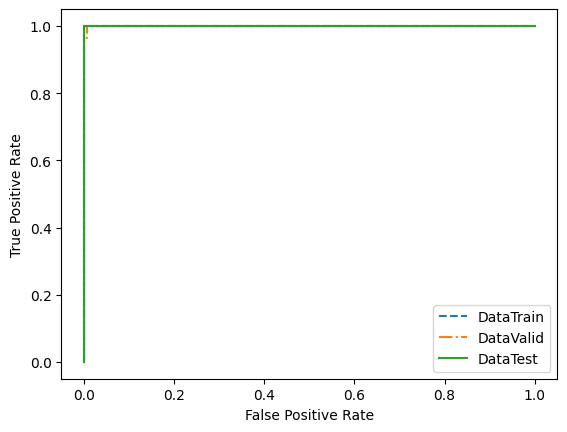

In [ ]:
nb_fpr, nb_tpr, _ = roc_curve(y_train, nb_probs)
nb_fpr2, nb_tpr2, _ = roc_curve(y_valid, nb_probs2)
nb_fpr3, nb_tpr3, _ = roc_curve(y_test, nb_probs3)

plt.plot(nb_fpr, nb_tpr, linestyle='--', label='DataTrain')
plt.plot(nb_fpr2, nb_tpr2, linestyle='-.', label='DataValid')
plt.plot(nb_fpr3, nb_tpr3, linestyle='-', label='DataTest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# MODELO NAIVE BAYES USANDO SOBREMUESTREO PARA EL DESBALANCEO DE CLASES

In [ ]:
# SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Entrenamiento del modelo Naive Bayes
model = GaussianNB()
model.fit(X_train_res, y_train_res)

GaussianNB()

In [ ]:
# Evaluacion con el conjunto de validación
y_valid_pred = model.predict(X_valid)
print("== VALIDACIÓN ==")
print(classification_report(y_valid, y_valid_pred))
print(confusion_matrix(y_valid, y_valid_pred))

== VALIDACIÓN ==
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1471
           1       1.00      0.93      0.96        29

    accuracy                           1.00      1500
   macro avg       1.00      0.97      0.98      1500
weighted avg       1.00      1.00      1.00      1500

[[1471    0]
 [   2   27]]


In [ ]:
# Evaluacion con el conjunto de prueba
y_test_pred = model.predict(X_test)
print("== TEST ==")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

== TEST ==
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1471
           1       1.00      0.97      0.98        29

    accuracy                           1.00      1500
   macro avg       1.00      0.98      0.99      1500
weighted avg       1.00      1.00      1.00      1500

[[1471    0]
 [   1   28]]


In [ ]:
# AUC Score para training set
nb_probs = model.predict_proba(X_train)[:, 1]
nb_auc_prob = roc_auc_score(y_train, nb_probs)
print("AUC Score:", nb_auc_prob)

# AUC Score para valid set
nb_probs2 = model.predict_proba(X_valid)[:, 1]
nb_auc_prob2 = roc_auc_score(y_valid, nb_probs2)
print("AUC Score:", nb_auc_prob2)

# AUC Score para test set
nb_probs3 = model.predict_proba(X_test)[:, 1]
nb_auc_prob3 = roc_auc_score(y_test, nb_probs3)
print("AUC Score:", nb_auc_prob3)

AUC Score: 1.0
AUC Score: 0.9995077240441642
AUC Score: 0.9998124663025387


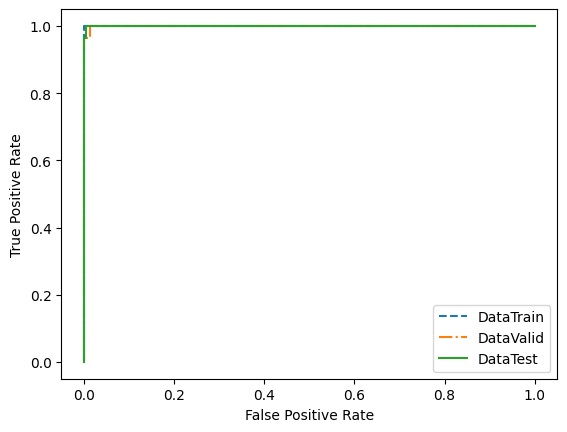

In [ ]:
nb_fpr, nb_tpr, _ = roc_curve(y_train, nb_probs)
nb_fpr2, nb_tpr2, _ = roc_curve(y_valid, nb_probs2)
nb_fpr3, nb_tpr3, _ = roc_curve(y_test, nb_probs3)

plt.plot(nb_fpr, nb_tpr, linestyle='--', label='DataTrain')
plt.plot(nb_fpr2, nb_tpr2, linestyle='-.', label='DataValid')
plt.plot(nb_fpr3, nb_tpr3, linestyle='-', label='DataTest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# MODELO NAIVE BAYES USANDO SUBMUESTREO PARA EL DESBALANCEO DE CLASES

In [ ]:
# Concatena X e Y
train_data = pd.concat([X_train, y_train], axis=1)

In [ ]:
# Separamos clases
fraud_transc = train_data[train_data['Fraud'] == 1]
no_fraud_transc = train_data[train_data['Fraud'] == 0]

In [ ]:
# Submuestreo sin reemplazo
submuestreo_fraud = no_fraud_transc.sample(n=len(fraud_transc), random_state=42, replace=False)

In [ ]:
# Mezcla
balanced_data = pd.concat([fraud_transc, submuestreo_fraud]).sample(frac=1, random_state=42)

X_train_bal = balanced_data.drop(columns=['Fraud'])
y_train_bal = balanced_data['Fraud']


In [ ]:
# Entrenamiento del modelo
model = GaussianNB()
model.fit(X_train_bal, y_train_bal)

GaussianNB()

In [ ]:
# == VALIDACIÓN ==
y_valid_pred = model.predict(X_valid)
print("== VALIDACIÓN ==")
print(classification_report(y_valid, y_valid_pred))
print(confusion_matrix(y_valid, y_valid_pred))

== VALIDACIÓN ==
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1471
           1       1.00      0.97      0.98        29

    accuracy                           1.00      1500
   macro avg       1.00      0.98      0.99      1500
weighted avg       1.00      1.00      1.00      1500

[[1471    0]
 [   1   28]]


In [ ]:
# == TEST ==
y_test_pred = model.predict(X_test)
print("== TEST ==")
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

== TEST ==
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1471
           1       1.00      0.97      0.98        29

    accuracy                           1.00      1500
   macro avg       1.00      0.98      0.99      1500
weighted avg       1.00      1.00      1.00      1500

[[1471    0]
 [   1   28]]


In [ ]:
# AUC Score para training set
nb_probs = model.predict_proba(X_train_bal)[:, 1]
nb_auc_prob = roc_auc_score(y_train_bal, nb_probs)
print("AUC Score:", nb_auc_prob)



# AUC Score para valid set
nb_probs2 = model.predict_proba(X_valid)[:, 1]
nb_auc_prob2 = roc_auc_score(y_valid, nb_probs2)
print("AUC Score:", nb_auc_prob2)



# AUC Score para test set
nb_probs3 = model.predict_proba(X_test)[:, 1]
nb_auc_prob3 = roc_auc_score(y_test, nb_probs3)
print("AUC Score:", nb_auc_prob3)

AUC Score: 1.0
AUC Score: 0.9997655828781734
AUC Score: 0.9999531165756347


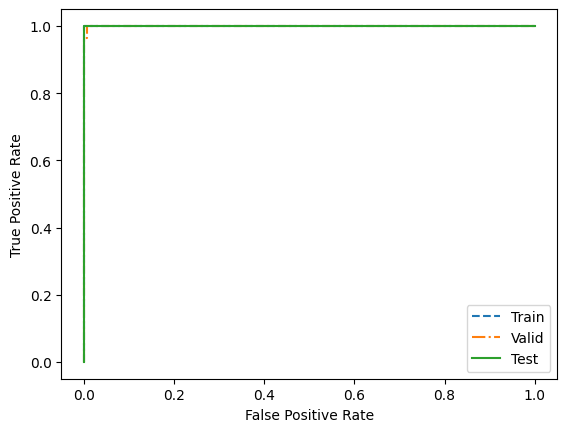

In [ ]:
fpr_train, tpr_train, _ = roc_curve(y_train_bal, nb_probs)
fpr_valid, tpr_valid, _ = roc_curve(y_valid, nb_probs2)
fpr_test, tpr_test, _ = roc_curve(y_test, nb_probs3)

plt.plot(fpr_train, tpr_train, linestyle='--', label='Train')
plt.plot(fpr_valid, tpr_valid, linestyle='-.', label='Valid')
plt.plot(fpr_test, tpr_test, linestyle='-', label='Test')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()